#### Integrated Hydrology

This is a series of problems to test and demonstrate the integrated hydrology components of ATS.  Integrated hydrology consists of Richards equation in the subsurface coupled to a diffusion wave approximation on the surface system.  Coupling is done through assuming continuous pressure and flux across the surface-subsurface interface.

Tests demonstrate a 1D column (showing dry-to-wet and wet-to-dry transitions), a 2D "open book" problem (showing that water flows down hill) and a typical 2D "hillslope" problem comparable to the Sulis et al (WRR) benchmark problems.

Author: Ethan Coon

In [1]:
%matplotlib inline
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import parse_xmf, parse_ats
import column_data, transect_data
import colors
import mesh
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colorbar

/Users/uec/codes/anaconda/2/5.1.0/base/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In the first example, we rain on a column for half a day, then turn off the rain.  A continuous, constant baseflow is applied as a sink at the bottom of the column.  Initially the column is partially saturated.  As rainfall > baseflow, the column saturates and ponded water expresses on the surface.  After rainfall stops, baseflow takes the water table below the surface again. 

This demonstrates reasonable performance in the dry-to-wet and wet-to-dry transitions.

In [2]:
# load the ATS solution
directory = "integrated_hydro-column.demo"

dat = column_data.column_data(["saturation_liquid"], directory=directory)
keys, times, dats = parse_ats.readATS(directory, "visdump_surface_data.h5", timeunits='d')
pd = parse_ats.getSurfaceData(keys, dats, "surface-ponded_depth")



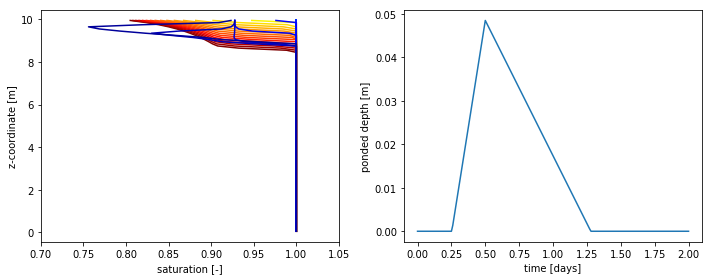

In [3]:
# plot the solution
z = dat[0,0,:]
cm = colors.cm_mapper(0,dat.shape[1]-1) # color the plots as a function of time
fig, axs = plt.subplots(1,2, figsize=(10,4))

for i in range(dat.shape[1]-1,0,-5):
    axs[0].plot(dat[1,i,:],z, color=cm(i))

axs[0].set_xlabel('saturation [-]')
axs[0].set_ylabel('z-coordinate [m]')
axs[0].set_xlim(0.7,1.05)

axs[1].plot(times, pd)
axs[1].set_xlabel("time [days]")
axs[1].set_ylabel("ponded depth [m]")

plt.tight_layout()
plt.show()

These are lowest-resolution runs (80m in x, 0.2m in z) from the Integrated Hydrology MIP #1 paper, Maxwell et al WRR, 2013, and demonstrate saturation-limited and infiltration-limited runs of integrated hydrology.  Note there is an error in that paper -- units of alpha in the van Genuchten curve are [1/m], not [1/cm].

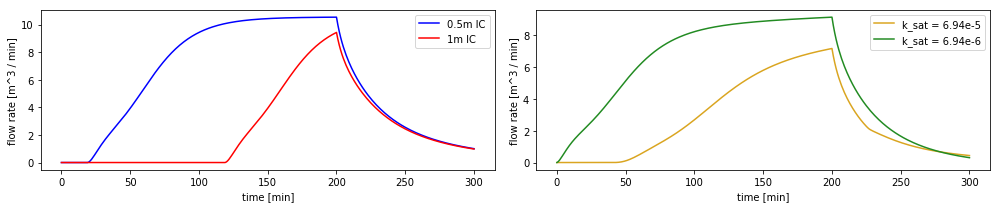

In [4]:
# plot the hydrograph
d1 = 'integrated_hydro-sat_limited1.demo'
d2 = 'integrated_hydro-sat_limited2.demo'
d3 = 'integrated_hydro-inf_limited1.demo'
d4 = 'integrated_hydro-inf_limited2.demo'
fig, axs = plt.subplots(1,2, figsize=(14,3))

dat = np.loadtxt(os.path.join(d1, 'surface_outlet_flux.dat'))
axs[0].plot(dat[:,0]/60.0, dat[:,1]/55389.0*60., 'b', label='0.5m IC')
dat2 = np.loadtxt(os.path.join(d2, 'surface_outlet_flux.dat'))
axs[0].plot(dat2[:,0]/60.0, dat2[:,1]/55389.0*60., 'r', label='1m IC')
axs[0].legend()
axs[0].set_xlabel('time [min]')
axs[0].set_ylabel('flow rate [m^3 / min]')

dat3 = np.loadtxt(os.path.join(d3, 'surface_outlet_flux.dat'))
axs[1].plot(dat3[:,0]/60.0, dat3[:,1]/55389.0*60., 'goldenrod', label='k_sat = 6.94e-5')
dat4 = np.loadtxt(os.path.join(d4, 'surface_outlet_flux.dat'))
axs[1].plot(dat4[:,0]/60.0, dat4[:,1]/55389.0*60., 'forestgreen', label='k_sat = 6.94e-6')
axs[1].legend()
axs[1].set_xlabel('time [min]')
axs[1].set_ylabel('flow rate [m^3 / min]')

plt.tight_layout()
plt.show()

These are lowest-resolution runs (80m in x, 0.2m in z) from the predecessor to that paper, Sulis et al 2010, which investigated the comparison across a variety of slopes as well. These demonstrate saturation-limited and infiltration-limited runs of integrated hydrology.

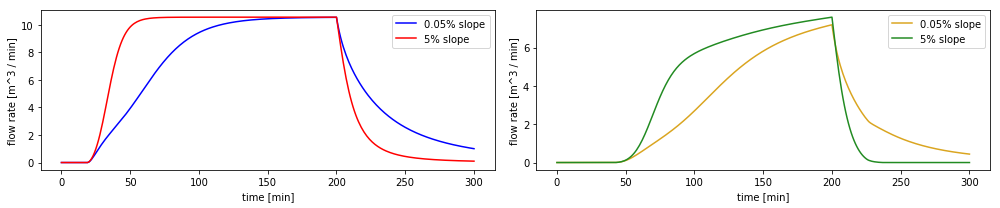

In [5]:
# plot the hydrograph
d1 = 'integrated_hydro-sat_limited1.demo'
d2 = 'integrated_hydro-sat_limited3.demo'
d3 = 'integrated_hydro-inf_limited1.demo'
d4 = 'integrated_hydro-inf_limited3.demo'
fig, axs = plt.subplots(1,2, figsize=(14,3))

n_liq = 55347.3783

dat = np.loadtxt(os.path.join(d1, 'surface_outlet_flux.dat'))
axs[0].plot(dat[:,0]/60.0, dat[:,1]/n_liq*60., 'b', label='0.05% slope')
dat2 = np.loadtxt(os.path.join(d2, 'surface_outlet_flux.dat'))
axs[0].plot(dat2[:,0]/60.0, dat2[:,1]/n_liq*60., 'r', label='5% slope')
axs[0].set_xlabel('time [min]')
axs[0].set_ylabel('flow rate [m^3 / min]')
axs[0].legend()

dat3 = np.loadtxt(os.path.join(d3, 'surface_outlet_flux.dat'))
axs[1].plot(dat3[:,0]/60.0, dat3[:,1]/n_liq*60., 'goldenrod', label='0.05% slope')
dat4 = np.loadtxt(os.path.join(d4, 'surface_outlet_flux.dat'))
axs[1].plot(dat4[:,0]/60.0, dat4[:,1]/n_liq*60., 'forestgreen', label='5% slope')
axs[1].legend()
axs[1].set_xlabel('time [min]')
axs[1].set_ylabel('flow rate [m^3 / min]')

plt.tight_layout()
plt.show()

In the next example, we simply rain on a V-catchment in 2D, allowing the water to pond.  This simply demonstrates that water runs downhill (in a coupled environment).  Plots show saturation (in colors) and the ponded depth (a line above the catchment).  

At time zero, a water table is established.  Infiltration occurs through the 30 hour plot.  By 60 hours, the domain is saturated and water is ponding on the surface.

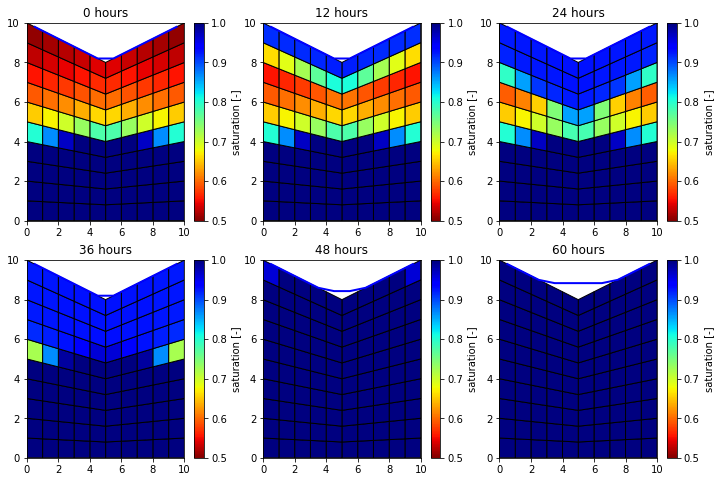

In [6]:
# plot the saturation at a few times
directory = "integrated_hydro-v.demo"

keys, times, dat = parse_ats.readATS(directory, "visdump_data.h5", timeunits='d')
dats = column_data.column_data(['surface-ponded_depth','surface-elevation'], 
                               directory=directory, filename="visdump_surface_data.h5", 
                               mesh_filename="visdump_surface_mesh.h5", coord=0)

fig, axs = plt.subplots(2,3,figsize=(12,8))

def plot(i, ax):
    cax = colorbar.make_axes(ax, 'right')[0]
    cax.set_ylabel("saturation [-]")

    transect_data.plot(dat["saturation_liquid.cell.0"][keys[i]][:,0], ax, cax,
                       0.5, 1.0, directory=directory, cmap="jet_r", label="saturation [-]")
    ax.plot(dats[0,0,:], dats[1,i,:]+dats[2,i,:], 'b', linewidth=2)
    ax.set_title("{0} hours".format(3*i))
    
plot(0, axs[0,0])
plot(4, axs[0,1])
plot(8, axs[0,2])
plot(12, axs[1,0])
plot(16, axs[1,1])
plot(20, axs[1,2])

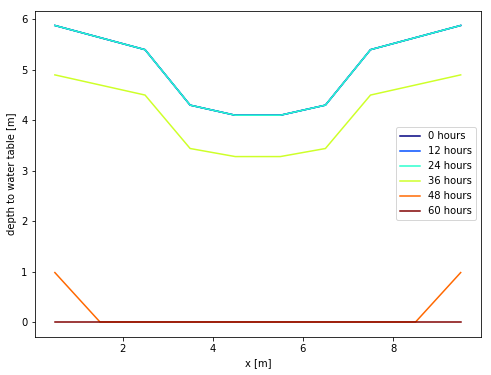

In [7]:
# plot the depth to water table as a function of time
#
# Note that the jaggedness of this plot is due
# a nonuniform mesh and sampling (discrete) issues.
#

directory = "integrated_hydro-v.demo"
keys, times, dat = parse_ats.readATS(directory, "visdump_data.h5", timeunits='d')
col_dat = transect_data.transect_data(['saturation_liquid',], keys=np.s_[0:21:4], directory=directory)

nvar, nt, nx, nz = col_dat.shape

# z_surf and z_bott is extrapolated based on dz, and is not necessarily exact if 
# dz varies in the top (respectively bottom) two cells
z_surf = col_dat[1,0,:,-1] + (col_dat[1,0,:,-1] - col_dat[1,0,:,-2])/2.
z_bott = col_dat[1,0,:,0] - (col_dat[1,0,:,1] - col_dat[1,0,:,0])/2.

# Determine the index of the lowest unsaturated cell at each time and x coordinate.
# Note that this is the right choice for water table, as a saturated zone might exist 
# on TOP of an unsaturated zone, for a perched aquifer, so we DON'T want the highest 
# saturated cell.
wtd = np.nan * np.ones((col_dat.shape[1], col_dat.shape[2]),'d')
for i in range(nx):
    for k in range(nt):
        where_unsat = np.where(col_dat[2,k,i,:] < 1.0)[0]
        if len(where_unsat) == 0:
            # nothing is unsaturated
            wtd[k,i] = 0.
        elif where_unsat[0] == 0:
            # nothing is saturated, wtd is the full column thickness
            wtd[k,i] = z_surf[i] - z_bott[i]
        else:
            # wt is in the domain -- average the first unsaturated with the last 
            # saturated, then subtract from the surf to get depth
            wtd[k,i] = z_surf[i] - (col_dat[1,k,i,where_unsat[0]] + col_dat[1,k,i,where_unsat[0]-1])/2 

# plot
fig,ax = plt.subplots(1,1, figsize=(8,6))
cm = colors.cm_mapper(0,nt-1)
for k in range(nt):
    ax.plot(col_dat[0,0,:,0], wtd[k,:], color=cm(k), label="{0} hours".format(3*4*k))
ax.set_xlabel("x [m]")
ax.set_ylabel("depth to water table [m]")
ax.legend()
plt.show()

The last demo is based off of the superslab problem from the above benchmark papers.  This is not that problem; it uses more slope and a broader variety of constitutive models.  The goal of this demo is to show how to extend the above integrated hydrology problems into cases with multiple materials or soil types.

Note this run is a bit bigger (10k grid cells) and is natively run on 2 cores.  It takes a bit long to run.

In [8]:
# plot the saturation at a few times
directory = "integrated_hydro-superslab.demo"

keys, times, dat = parse_ats.readATS(directory, "visdump_data.h5", timeunits='d')
dats = column_data.column_data(['surface-ponded_depth','surface-elevation'], 
                               directory=directory, filename="visdump_surface_data.h5", 
                               mesh_filename="visdump_surface_mesh.h5", coord=0)

fig, axs = plt.subplots(2,3,figsize=(12,8))

def plot(i, ax):
    cax = colorbar.make_axes(ax, 'right')[0]
    cax.set_ylabel("saturation [-]")

    transect_data.plot(dat["saturation_liquid.cell.0"][keys[i]][:,0], ax, cax,
                       0.5, 1.0, directory=directory, cmap="jet_r", label="saturation [-]")
    ax.plot(dats[0,0,:], dats[1,i,:]+dats[2,i,:], 'b', linewidth=2)
    ax.set_title("{0} hours".format(3*i))
    
plot(0, axs[0,0])
plot(4, axs[0,1])
plot(8, axs[0,2])
plot(12, axs[1,0])
plot(16, axs[1,1])
plot(20, axs[1,2])

IOError: Unable to open file (unable to open file: name = 'integrated_hydro-superslab.demo/visdump_data.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)